In [1]:
feed_info_path = "./wechat_algo_data1/feed_info.csv"
feed_embedding_path = "./wechat_algo_data1/feed_embeddings.csv"
user_action_path = "./wechat_algo_data1/user_action.csv"

In [2]:
import pandas as pd

feed_info_df = pd.read_csv(feed_info_path)
feed_embedding_df = pd.read_csv(feed_embedding_path)
user_action_df = pd.read_csv(user_action_path)

In [3]:
feed_embedding_df['feed_embedding']

0         -0.02032269 0.06095614 0.11057708 0.03385210 0...
1         -0.07594238 0.01796364 -0.00135112 -0.00333468...
2         -0.05067272 -0.08208735 -0.01929738 -0.0150182...
3         -0.06976026 0.00218324 0.04416835 0.06146711 -...
4         -0.04981736 -0.03523079 0.03022859 0.06672543 ...
5         -0.10077595 -0.01764622 0.03897166 -0.04593844...
6         -0.07481042 -0.07795808 0.00200225 -0.02691050...
7         -0.00903127 0.04316609 0.06915708 0.00960549 0...
8         -0.04625623 -0.01046129 0.08407867 -0.00102488...
9         -0.03590044 0.01959696 0.01913530 0.03326439 0...
10        0.02330088 -0.08954024 0.08977091 0.00342382 -...
11        -0.06054044 -0.04755686 0.11235277 -0.02685562...
12        -0.02812439 0.06064593 0.05121400 -0.04211963 ...
13        -0.02090467 -0.05882109 -0.02103992 0.01097556...
14        -0.05427841 -0.00819579 0.00886164 -0.04061771...
15        0.05334136 0.03053676 0.07789880 0.02851067 -0...
16        -0.04240906 0.01977679 0.11723

In [4]:
user_action_df.head()

,userid,feedid,date_,device,read_comment,comment,like,play,stay,click_avatar,forward,follow,favorite
0,8,71474,1,1,0,0,1,500,5366,0,0,0,0
1,8,73916,1,1,0,0,0,250,1533,0,0,0,0
2,8,50282,1,1,0,0,0,750,1302,0,0,0,0
3,8,11391,1,1,0,0,1,3750,5191,0,0,0,0
4,8,27349,1,1,0,0,0,250,800,0,0,0,0


In [5]:
#feed_info_df = feed_info_df[['feedid', 'authorid', 'videoplayseconds', 'bgm_song_id', 'bgm_singer_id']]

In [6]:
feed_info_df.shape

(106444, 15)

In [7]:
feed_embedding_df.shape

(106444, 2)

In [8]:
user_action_df.head()

,userid,feedid,date_,device,read_comment,comment,like,play,stay,click_avatar,forward,follow,favorite
0,8,71474,1,1,0,0,1,500,5366,0,0,0,0
1,8,73916,1,1,0,0,0,250,1533,0,0,0,0
2,8,50282,1,1,0,0,0,750,1302,0,0,0,0
3,8,11391,1,1,0,0,1,3750,5191,0,0,0,0
4,8,27349,1,1,0,0,0,250,800,0,0,0,0


### Feed 信息的统计


In [9]:
feed_info_df.columns

Index(['feedid', 'authorid', 'videoplayseconds', 'description', 'ocr', 'asr',
       'bgm_song_id', 'bgm_singer_id', 'manual_keyword_list',
       'machine_keyword_list', 'manual_tag_list', 'machine_tag_list',
       'description_char', 'ocr_char', 'asr_char'],
      dtype='object')

In [10]:
feed_info_df['feedid'].nunique()

106444

统计关于authorid的信息

In [11]:
feed_info_df['authorid'].isna().sum()

0

In [12]:
feed_info_df['authorid'].nunique()

18789

In [13]:
author_n_feeds = feed_info_df['authorid'].value_counts()

In [14]:
author_n_feeds[14652]

1

In [15]:
# 统计关于authorid的信息
((feed_info_df['authorid'].value_counts())/5).hist(bins=70)

In [16]:
feed_info_df['author_n_feeds'] = feed_info_df['authorid'].apply(lambda x: author_n_feeds[x])

视频时长videoplayseconds

In [17]:
# 视频播放时长的统计信息
feed_info_df[['videoplayseconds']].describe()

,videoplayseconds
count,106444.000000
mean,34.446545
std,277.086122
min,2.000000
25%,14.000000
50%,26.000000
75%,54.000000
max,59960.000000


In [18]:
from matplotlib import pyplot as plt

In [19]:
feed_info_df['videolength_bucket'] = feed_info_df['videoplayseconds'].apply(lambda x: int(x/10) + 1)

In [20]:
# 视频的主要时长都在80s以内，也就是绝大部分都是短视频，极少数是长视频
feed_info_df['videolength_bucket'].value_counts()

2       31328
7       20130
3       16450
4       10369
1       10175
6       10172
5        7805
1014        1
897         1
1028        1
965         1
3063        1
1107        1
2518        1
2521        1
792         1
28          1
2594        1
5997        1
1394        1
628         1
2960        1
Name: videolength_bucket, dtype: int64

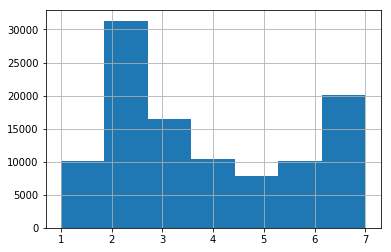

In [21]:
# 视频时长的分布,单位为 10s 
feed_info_df[feed_info_df['videolength_bucket'] < 10]['videolength_bucket'].hist(bins=7)

In [22]:
# 对视频时长做指数平滑
import numpy as np
feed_info_df['videolength_log'] = np.log(feed_info_df['videoplayseconds'] + 1)

对bgm_song_id进行处理

In [23]:
feed_info_df['bgm_song_id'].isna().sum() / len(feed_info_df)

0.49774529329976325

In [24]:
bgm_song_nums = feed_info_df['bgm_song_id'].value_counts()

对bgm_singer_id进行处理

In [25]:
# 视频作者总数
feed_info_df['bgm_singer_id'].isna().sum() / len(feed_info_df)

0.49774529329976325

In [26]:
# 视频作者作品数
feed_info_df['authorid'].value_counts()

14653    349
14122    296
18286    296
4407     260
4883     210
660      201
12577    193
16288    192
14028    174
17149    170
4537     168
1955     161
1072     150
11386    150
11296    149
13941    149
8085     145
13946    137
14015    137
3043     135
10964    133
2433     132
12603    130
2595     129
463      128
10889    128
4608     126
12888    125
12889    124
10671    120
        ... 
9702       1
13796      1
3555       1
1506       1
7649       1
17834      1
16101      1
9958       1
5920       1
1826       1
4193       1
16427      1
18474      1
8231       1
6176       1
12263      1
16357      1
14308      1
2018       1
8161       1
10150      1
16293      1
4003       1
1954       1
8097       1
10086      1
3939       1
12071      1
16165      1
0          1
Name: authorid, Length: 18789, dtype: int64

In [27]:
feed_info_df.columns

Index(['feedid', 'authorid', 'videoplayseconds', 'description', 'ocr', 'asr',
       'bgm_song_id', 'bgm_singer_id', 'manual_keyword_list',
       'machine_keyword_list', 'manual_tag_list', 'machine_tag_list',
       'description_char', 'ocr_char', 'asr_char', 'author_n_feeds',
       'videolength_bucket', 'videolength_log'],
      dtype='object')

In [28]:
# 对于authorid，bgm_singer_id, bgm_song_id 这些id类特征，可以统计每一个用户的最感兴趣的集合
# 根据用户的历史行为信息进行构造，
# 用户历史行为feed对应的频繁的authorid可能是由于作者的视频内容得到用户的喜爱，而根据authorid所创作的视频的类型等等数据可以对authorid进行画像
# 对bgm_singer_id的统计可以统计出用户对于歌手的偏爱
# 对bgm_song_id的统计可以得到用户比较喜欢的歌曲集合

对description、OCR、ASR进行处理

In [29]:
# 这内容已经信息已经融入到了embedding向量中，所以可以先不管，
# 当需要对新的视频进行检验的时候，直接计算新的视频与用于历史action视频的相似的
# 将相似度作为一个新的特征输入到树模型中 

In [30]:
feed_info_df['description'][0].split(' ')

['104741',
 '122649',
 '8109',
 '117252',
 '65632',
 '23463',
 '118668',
 '45861',
 '8109',
 '142955',
 '27736',
 '21751',
 '112151',
 '116906',
 '32715',
 '93520',
 '32714',
 '80461',
 '8109',
 '93563',
 '102383',
 '10952',
 '48706',
 '12885',
 '68441',
 '93563',
 '8097',
 '134820',
 '55911',
 '80449',
 '79213',
 '23233',
 '13997',
 '53706',
 '104690',
 '6994']

In [31]:
feed_info_df['ocr'].isna().sum()

29606

In [32]:
feed_info_df['asr'].isna().sum()

27402

In [33]:
feed_info_df['description'].isna().sum()

3358

对manual_key_word_list、machine_key_word_list 
以及 manual_tag_list、machine_tag_list 等进行处理


In [34]:
feed_info_df['manual_keyword_list'][9].split(';') + feed_info_df['machine_keyword_list'][9].split(';')

['15506', '17582', '10844', '25209', '219', '4826', '25500']

In [35]:
type(feed_info_df['manual_keyword_list'][0]) == str

True

In [36]:
feed_info_df['machine_keyword_list'] = feed_info_df['machine_keyword_list'].apply(lambda x: x.split(';') if type(x) == str else [])

In [37]:
feed_info_df['manual_keyword_list'] = feed_info_df['manual_keyword_list'].apply(lambda x: x.split(';') if type(x) == str else [])

In [38]:
feed_info_df['keyword_list'] = feed_info_df['machine_keyword_list'] + feed_info_df['manual_keyword_list']

In [39]:
#对关键词列表用TF-IDF算法计算每一个关键词的权重
#挖掘出不同关键词feed的关键词信息
feed_info_df['keyword_list'].values

array([list(['26334', '219', '25209', '7715', '18541', '15506', '7715', '17582']),
       list(['24078', '19924', '8199', '18322', '4243']),
       list(['11696', '6926']), ..., list(['11411', '18009', '1312']),
       list(['3212', '17707', '17582']), list([])], dtype=object)

In [40]:
feed_info_df.index

RangeIndex(start=0, stop=106444, step=1)

In [41]:
from gensim.models import TfidfModel
from gensim.corpora import Dictionary

def create_feed_keyword_profile(feed_info):
  dataset = feed_info['keyword_list'].values
  from gensim.corpora import Dictionary
  dct = Dictionary(dataset)
  corpus = [dct.doc2bow(line) for line in dataset]
  model = TfidfModel(corpus)
  _feed_top5_keywords = []
  _feed_top5_keywords_weights = []
  for i in range(len(corpus)):
    vector = model[corpus[i]]
    feed_keywords = sorted(vector, key=lambda x: x[1], reverse=True)[:5]
    top5_keywords_weights = dict(map(lambda x: (dct[x[0]], x[1]), feed_keywords))
    top5_keywords = [i[0] for i in top5_keywords_weights.items()]
    _feed_top5_keywords.append(top5_keywords)
    _feed_top5_keywords_weights.append(top5_keywords_weights)
  return _feed_top5_keywords, _feed_top5_keywords_weights

D:\anacanda\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [42]:
_feed_top5_keywords, _feed_top5_keywords_weights = create_feed_keyword_profile(feed_info_df)

In [43]:
feed_info_df['top5_keywords'] = _feed_top5_keywords
feed_info_df['top5_keywords_weights'] = _feed_top5_keywords_weights
print(feed_info_df['top5_keywords_weights'].values)

[{'7715': 0.614992440276734, '18541': 0.4566241526598109, '15506': 0.3587227482122384, '17582': 0.30966455081137495, '26334': 0.2893164036591804}
 {'4243': 0.6558125797696941, '8199': 0.6165417424995341, '18322': 0.2579765917438886, '24078': 0.2513540576680799, '19924': 0.24506194273582219}
 {'6926': 0.8718180301112212, '11696': 0.4898298912612314} ...
 {'18009': 0.7018648283582362, '1312': 0.6197987358502529, '11411': 0.3510488424024384}
 {'3212': 0.6818467480119231, '17707': 0.6198377352181461, '17582': 0.3884407216361391}
 {}]


In [44]:
feed_info_df['machine_tag_list'].values

array(['269 0.8525666;81 0.8525666;8 1.1e-07;306 0.0;207 6.31e-06;10 0.27404302',
       '267 0.99293476;194 0.99293476', '23 0.64771646;202 0.64771646',
       ...,
       '262 0.81548262;179 0.81548262;8 0.16021954;306 0.0;207 0.00305542;10 0.27936044',
       '269 0.53156692;82 0.53156692', '271 0.80507952;28 0.80507952'],
      dtype=object)

In [45]:
# 关于标签，用户打的标签和机器打的标签是不一样的
# 机器打的标签有置信度的信息，可以只将置信度足够高的进行处理，而对于置信度太低的则不处理
# 只将置信度高于 0.5 的作为新增的标签，而置信度低于 0.5 的直接舍弃掉
def get_machine_tag_list(feed_info):
  original_tags = feed_info['machine_tag_list'].values
  topn_machine_tags = []
  for i in range(len(original_tags)):
    if(type(original_tags[i]) == str):
      tags = []
      tag_with_weights = original_tags[i].split(';')
      for tag_weight in tag_with_weights:
        tag = tag_weight.split(' ')[0]
        weight = float(tag_weight.split(' ')[1])
        if weight >= 0.5:
          tags.append(tag)
      topn_machine_tags.append(tags)
    else:
      topn_machine_tags.append([])
  return topn_machine_tags

In [46]:
valid_machine_tags = get_machine_tag_list(feed_info_df)

In [47]:
feed_info_df['machine_tag_list'] = valid_machine_tags

In [48]:
feed_info_df['manual_tag_list'] = feed_info_df['manual_tag_list'].apply(lambda x: x.split(';') if type(x) == str else [])

In [49]:
feed_info_df['tag_list'] = feed_info_df['machine_tag_list'] + feed_info_df['manual_tag_list']

In [50]:
dct = Dictionary(feed_info_df['tag_list'])

In [51]:
# 分别计算feed的各个tag_list的权重
def create_feed_tags_profile(feed_info):
  dataset = feed_info['tag_list'].values
  from gensim.corpora import Dictionary
  dct = Dictionary(dataset)
  corpus = [dct.doc2bow(line) for line in dataset]
  model = TfidfModel(corpus)
  _tags = []
  _tags_weights = []
  for i in range(len(corpus)):
    vector = model[corpus[i]]
    feed_tags = sorted(vector, key=lambda x: x[1], reverse=True)
    tags_weights = dict(map(lambda x: (dct[x[0]], x[1]), feed_tags))
    tags = [i[0] for i in tags_weights.items()]
    _tags.append(tags)
    _tags_weights.append(tags_weights)
  return _tags, _tags_weights

In [52]:
tags, tags_weights = create_feed_tags_profile(feed_info_df)

In [53]:
feed_info_df['tag_list'] = tags
feed_info_df['tag_weights'] = tags_weights

In [54]:
feed_info_df = feed_info_df.merge(feed_embedding_df, on='feedid')

In [55]:
feed_info_df.drop(columns=['description', 'ocr', 'asr', 'manual_keyword_list', 'machine_keyword_list', 'manual_tag_list', 'machine_tag_list', 'description_char', 'ocr_char', 'asr_char'], inplace=True)

In [56]:
feed_info_df.drop(columns='keyword_list', inplace=True)

In [57]:
def str_to_float(input):
    output=[]
    for i in input:
        try:
            output.append(float(i))
        except ValueError:
            continue
    return output

In [58]:
feed_info_df['feed_embedding'] = feed_info_df['feed_embedding'].apply(lambda x: str_to_float(x.split(' ')))

In [59]:
def string_to_float(string_list):
  float_list = []
  for number in string_list[:512]:
    float_list.append(float(number))
  return float_list

In [60]:
feed_info_df.to_csv('./feed_info_modified1.csv', index=None)

In [61]:
### 

### user_action信息的统计
    主要目的是根据用户的历史行为信息，做出用户画像

In [62]:
user_action_df['userid'].nunique()

20000

In [63]:
user_action_df['feedid'].nunique()

96564

In [64]:
feed_set = set(feed_info_df['feedid'].unique())

In [65]:
cold_start_feed = 0
for feedid in user_action_df['feedid'].unique():
  if feedid not in feed_set:
    cold_start_feed += 1

In [66]:
# 没有冷启动的feed
cold_start_feed

0

In [67]:
user_action_df.columns

Index(['userid', 'feedid', 'date_', 'device', 'read_comment', 'comment',
       'like', 'play', 'stay', 'click_avatar', 'forward', 'follow',
       'favorite'],
      dtype='object')

In [68]:
user_action_df['date_'].value_counts()

11    614175
14    609036
10    596886
13    566627
3     543566
12    532038
9     512466
4     504623
8     500120
7     480460
1     478489
6     472726
2     461842
5     444828
Name: date_, dtype: int64

In [69]:
user_action_df["device"].value_counts()

2    5601074
1    1716808
Name: device, dtype: int64

In [70]:
user_action_df["read_comment"].value_counts()

0    7061640
1     256242
Name: read_comment, dtype: int64

In [71]:
user_action_df['like'].value_counts()

0    7129045
1     188837
Name: like, dtype: int64

In [72]:
user_action_df["click_avatar"].value_counts()

0    7262754
1      55128
Name: click_avatar, dtype: int64

In [73]:
user_action_df["forward"].value_counts()

0    7289919
1      27963
Name: forward, dtype: int64

In [74]:
feed_info_df

,feedid,authorid,videoplayseconds,bgm_song_id,bgm_singer_id,author_n_feeds,videolength_bucket,videolength_log,top5_keywords,top5_keywords_weights,tag_list,tag_weights,feed_embedding
0,43549,6165,38,19356.0,11703.0,1,4,3.663562,"[7715, 18541, 15506, 17582, 26334]","{'7715': 0.614992440276734, '18541': 0.4566241...","[81, 269, 159, 6]","{'81': 0.7541818423569444, '269': 0.6557321638...","[-0.00509984, -0.0590496, -0.01864357, -0.0142..."
1,77432,9386,60,NaN,NaN,6,7,4.110874,"[4243, 8199, 18322, 24078, 19924]","{'4243': 0.6558125797696941, '8199': 0.6165417...","[194, 267, 159, 6]","{'194': 0.9115099703843318, '267': 0.409440061...","[0.02817863, -0.02137377, 0.06678647, 0.014733..."
2,12921,2996,15,10288.0,11354.0,36,2,2.772589,"[6926, 11696]","{'6926': 0.8718180301112212, '11696': 0.489829...","[202, 23, 160, 6]","{'202': 0.7338004271707812, '23': 0.6000257252...","[-0.01880374, 0.03276707, 0.09490133, 0.031316..."
3,34538,12577,18,24435.0,13645.0,193,2,2.944439,"[3727, 1197, 5454]","{'3727': 0.7021281302631878, '1197': 0.5196877...","[328, 13, 159, 6]","{'328': 0.746101554312214, '13': 0.65971641287...","[-0.05007412, -0.11540501, 0.04330789, -0.0187..."
4,75414,7185,16,23428.0,10730.0,2,2,2.833213,"[17083, 8058, 15621, 4123, 21639]","{'17083': 0.6390918560719752, '8058': 0.461373...","[81, 269, 159, 6]","{'81': 0.7541818423569444, '269': 0.6557321638...","[0.05636294, 0.01753669, 0.01241871, 0.0152164..."
5,34539,2595,43,16541.0,17296.0,129,5,3.784190,"[529, 26954, 2666, 9298]","{'529': 0.7689211040691577, '26954': 0.4554645...","[45, 239, 169, 159]","{'45': 0.8509458580098415, '239': 0.4728908281...","[0.07747091, 0.02647814, 0.0786632, -0.0200964..."
6,101310,8115,15,19367.0,10532.0,18,2,2.772589,"[12865, 10664, 13433, 19485, 11002]","{'12865': 0.5243636997625173, '10664': 0.45933...","[246, 237, 9, 6]","{'246': 0.7746825437492408, '237': 0.470565982...","[-0.01297182, -0.01348432, 0.05005981, 0.00076..."
7,13769,11696,25,NaN,NaN,14,3,3.258097,"[11061, 15752, 8800]","{'11061': 0.6469539287181666, '15752': 0.57009...","[37, 17, 9, 6]","{'37': 0.6725386307097304, '17': 0.58070454840...","[-0.0552958, -0.04448033, 0.02940514, 0.081417..."
8,6311,9533,60,NaN,NaN,3,7,4.110874,"[18428, 17892]","{'18428': 0.7238019284139826, '17892': 0.69000...","[9, 6]","{'9': 0.9989755474927385, '6': 0.0452532375812...","[-0.01446141, -0.00452141, 0.0790388, 0.013322..."
9,6801,13501,14,NaN,NaN,4,2,2.708050,"[4826, 25500, 15506, 17582, 10844]","{'4826': 0.5871899375225033, '25500': 0.439361...","[81, 269, 159, 6]","{'81': 0.7541818423569444, '269': 0.6557321638...","[-0.02395611, -0.01667979, 0.09536444, 0.00409..."


In [75]:
a.sum()

NameError: name 'a' is not defined

In [ ]:
user_action_df["date_"].max()

In [ ]:
test_df = pd.read_csv('./wechat_algo_data1/test_a.csv')

In [ ]:
test_df.shape

In [ ]:
user_action_df['follow'].value_counts()

In [ ]:
user_action_df[user_action_df['follow'] == 1]

In [ ]:
actions = ['read_comment', 'like', 'click_avatar', 'forward', 'comment', 'favorite', 'follow']

In [ ]:
action_nums = {}
for action in actions:
  action_nums[action] = user_action_df[action].sum()
  print("while %s is decided:"%action)
  for other_action in actions:
    if other_action == action:
      continue
    else:
      print("%s rate is %f"%(other_action,user_action_df[user_action_df[action] == 1][other_action].sum() / action_nums[action]))
  print("--------------------------------------------------------------------")